# Investigating PPD Complaints
<ul>
    <li>Types of Complaints</li>
    <li>Demographics of Compliant Filers</li>
    <li>Complaint Investigation and Discipline</li>
</ul>

## Import Libraries & Data 


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from matplotlib.ticker import FuncFormatter

In [3]:
complaints = pd.read_csv("https://raw.githubusercontent.com/bri-ne/MUSA-550/main/data/ppd_complaints.csv")
demographics = pd.read_csv("https://raw.githubusercontent.com/bri-ne/MUSA-550/main/data/ppd_complainant_demographics.csv")
disciplines = pd.read_csv("https://raw.githubusercontent.com/bri-ne/MUSA-550/main/data/ppd_complaint_disciplines.csv")


## Complaint Types Data 
### <i>Exploring, cleaning, and manipulating data </i>

In [4]:
#I'm going to be looking at complaint type, so for ease I renamed the complaint classification column 

complaints = complaints.rename(columns={'general_cap_classification':'offense'})
complaints.head()

,complaint_id,date_received,district_occurrence,offense,summary
0,16-0001,2016-01-19,1700,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 1-2-16 at app..."
1,16-0002,2016-01-19,2400,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 1-2-16, they ..."
2,16-0003,2016-01-19,1900,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 12-29-15 at 6..."
3,16-0004,2016-01-11,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0..."
4,16-0005,2016-01-11,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w..."


In [5]:
complaints['Counts'] = np.zeros(len(complaints))
complaintsG2 = complaints.groupby("offense", as_index=False).count().sort_values(by='Counts', ascending=False)

In [6]:
top5 = complaintsG2.head(n=5)
top5 = top5[["offense", "Counts"]]

In [7]:
# investigating the most common. this data set runs from 2016 until present 
top5

,offense,Counts
2,DEPARTMENTAL VIOLATIONS,967
7,LACK OF SERVICE,802
10,PHYSICAL ABUSE,567
13,VERBAL ABUSE,327
12,UNPROFESSIONAL CONDUCT,276


In [8]:
# I want to compare by mean of 2016-2019 data to 2020
#first I have to clean up and transform date values

complaints["date_received"] = pd.to_datetime(complaints["date_received"])
date_strings = complaints["date_received"].dt.strftime("%Y-%m")

In [9]:
date_strings.iloc[1]

'2016-01'

In [10]:
complaints["date_received"] = date_strings
complaints.head()

,complaint_id,date_received,district_occurrence,offense,summary,Counts
0,16-0001,2016-01,1700,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 1-2-16 at app...",0.0
1,16-0002,2016-01,2400,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 1-2-16, they ...",0.0
2,16-0003,2016-01,1900,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 12-29-15 at 6...",0.0
3,16-0004,2016-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0
4,16-0005,2016-01,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w...",0.0


In [11]:
#convert back to datetime so that I can extract year
complaints["date_received"]  = pd.to_datetime(complaints["date_received"])

In [12]:
#extracting month and year
complaints['Month'] = complaints["date_received"].dt.month
complaints['Year'] = complaints["date_received"].dt.year 

In [13]:
complaints.head()

,complaint_id,date_received,district_occurrence,offense,summary,Counts,Month,Year
0,16-0001,2016-01-01,1700,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 1-2-16 at app...",0.0,1,2016
1,16-0002,2016-01-01,2400,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 1-2-16, they ...",0.0,1,2016
2,16-0003,2016-01-01,1900,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 12-29-15 at 6...",0.0,1,2016
3,16-0004,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
4,16-0005,2016-01-01,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w...",0.0,1,2016


In [14]:
# getting just the 2016 to 2019 values 
complaints1619 = complaints.loc[complaints['Year'] < 2020]
complaints1619.tail()

,complaint_id,date_received,district_occurrence,offense,summary,Counts,Month,Year
2637,19-0678,2019-12-01,1400,CRIMINAL ALLEGATION,"According to the complainant, on 12-26-19 at 9...",0.0,12,2019
2638,19-0679,2019-12-01,1500,VERBAL ABUSE,"According to the complainant, on 12-30-19 at 4...",0.0,12,2019
2639,19-0680,2019-12-01,2600,LACK OF SERVICE,"According to the complainant, on 11-9-19 at 11...",0.0,12,2019
2640,19-0681,2019-12-01,1700,LACK OF SERVICE,"According to the complainant, on 12-08-19, the...",0.0,12,2019
2641,19-0682,2019-12-01,300,VERBAL ABUSE,"According to the complainant, on 12-30-19, the...",0.0,12,2019


In [15]:
#getting just the 2020 values
complaints2020 = complaints.loc[complaints['Year'] == 2020]
complaints2020.tail()

,complaint_id,date_received,district_occurrence,offense,summary,Counts,Month,Year
3290,20-0650,2020-12-01,800,LACK OF SERVICE,"On 12-23-20 at 2:00 PM, the complainant called...",0.0,12,2020
3291,20-0651,2020-12-01,1200,LACK OF SERVICE,"According to the complaint, on 12-25-20 at 12:...",0.0,12,2020
3292,20-0652,2020-12-01,2200,DEPARTMENTAL VIOLATIONS,"According to the complaint, on 11-10-20 at 10:...",0.0,12,2020
3293,20-0653,2020-12-01,2400,PHYSICAL ABUSE,"On 9-10-20 at 2:00 PM, while handcuffed and sh...",0.0,12,2020
3294,20-0654,2020-12-01,1200,DEPARTMENTAL VIOLATIONS,The complainants child was bullied and threat...,0.0,12,2020


In [16]:
#grouping first by year, then by offense for 2020

group2020 = complaints2020.groupby(["Year", "offense"], as_index = False).count().sort_values(by=['Year','Counts'], ascending=False)
group2020.head()

,Year,offense,complaint_id,date_received,district_occurrence,summary,Counts,Month
2,2020,DEPARTMENTAL VIOLATIONS,198,198,184,198,198,198
6,2020,LACK OF SERVICE,140,140,134,140,140,140
8,2020,PHYSICAL ABUSE,134,134,131,134,134,134
10,2020,UNPROFESSIONAL CONDUCT,50,50,49,50,50,50
11,2020,VERBAL ABUSE,36,36,35,36,36,36


In [17]:
#grouping first by year, then by offense for 2016-2019

group1619 = complaints1619.groupby(["Year", "offense"], as_index = False).count().sort_values(by=['Year','Counts'], ascending=False)
group1619.head()

,Year,offense,complaint_id,date_received,district_occurrence,summary,Counts,Month
37,2019,DEPARTMENTAL VIOLATIONS,211,211,211,211,211,211
42,2019,LACK OF SERVICE,129,129,129,129,129,129
44,2019,PHYSICAL ABUSE,103,103,103,103,103,103
46,2019,UNPROFESSIONAL CONDUCT,63,63,62,63,63,63
47,2019,VERBAL ABUSE,48,48,48,48,48,48


In [18]:
# I really only want to look a few offense types, so i'll pull them out now
subset1619 = group1619[group1619['offense'].str.contains('VER|PHY|UNPROF')]
subset2020 = group2020[group2020['offense'].str.contains('VER|PHY|UNPROF')]

In [19]:
subset1619['offense'].unique()


array([' PHYSICAL ABUSE', ' UNPROFESSIONAL CONDUCT', ' VERBAL ABUSE'],
      dtype=object)

In [20]:
subset2020['offense'].unique()
#it worked!


array([' PHYSICAL ABUSE', ' UNPROFESSIONAL CONDUCT', ' VERBAL ABUSE'],
      dtype=object)

<b> I chose to work with Verbal Abuse, Physical Abuse, and Unprofessional Conduct not only because they were in the Top 5 for all years, but also because the remaining Top 5 complaint types are vague. </b> 

Some have voiced their concerns about the vaguenss of "Departmental Discipline," which <a href="https://www.phila.gov/media/20210521150500/Collaborative-Review-and-Reform-of-the-PPD-Police-Board-of-Inquiry.pdf"> according to the Police Advisory Commisssion </a> can include anything from "improper search or arrest" to "allegations of theft, mishandling evidence, and failure to report police actions." I was worried that Lack of Service might also be an inconsistent and vague category. 


In [21]:
#clean up my df a little more
subset1619.drop(
    labels = ["complaint_id", "date_received", "district_occurrence", "summary", "Month"],
    axis = 1,
    inplace = True)

subset2020.drop(
    labels = ["complaint_id", "date_received", "district_occurrence", "summary", "Month"],
    axis = 1,
    inplace = True)

C:\Users\brine\miniconda3\envs\musa-550-fall-2021\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
subset1619.head()

,Year,offense,Counts
44,2019,PHYSICAL ABUSE,103
46,2019,UNPROFESSIONAL CONDUCT,63
47,2019,VERBAL ABUSE,48
31,2018,PHYSICAL ABUSE,114
34,2018,VERBAL ABUSE,66


In [23]:
subset2020

,Year,offense,Counts
8,2020,PHYSICAL ABUSE,134
10,2020,UNPROFESSIONAL CONDUCT,50
11,2020,VERBAL ABUSE,36


In [24]:
#I want to take means of counts, so I need to convert this to non-string datatype
subset1619['Counts'] = subset1619['Counts'].astype(int)
subset2020['Counts'] = subset2020['Counts'].astype(int)

C:\Users\brine\AppData\Local\Temp/ipykernel_31544/2397643075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1619['Counts'] = subset1619['Counts'].astype(int)
C:\Users\brine\AppData\Local\Temp/ipykernel_31544/2397643075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2020['Counts'] = subset2020['Counts'].astype(int)


In [25]:
# this is the average for each type of offense over the lasta four years 2016-2019
group1619 = subset1619.groupby(["offense"], as_index=False).mean()
group1619 = group1619[["offense", "Counts"]]
group1619.head()

,offense,Counts
0,PHYSICAL ABUSE,99.50
1,UNPROFESSIONAL CONDUCT,48.75
2,VERBAL ABUSE,68.75


# Matplotlib: Simple Chart

### Matplotlib
I chose to use <b>matplotlib</b> for this first plot because it is statistically simple and the chart was quick to put together, as a simple plot should be. The chart offers some insight into whether the amount of frequent complaint types in 2020 drastically differs from the average of complaints made over the last few years.

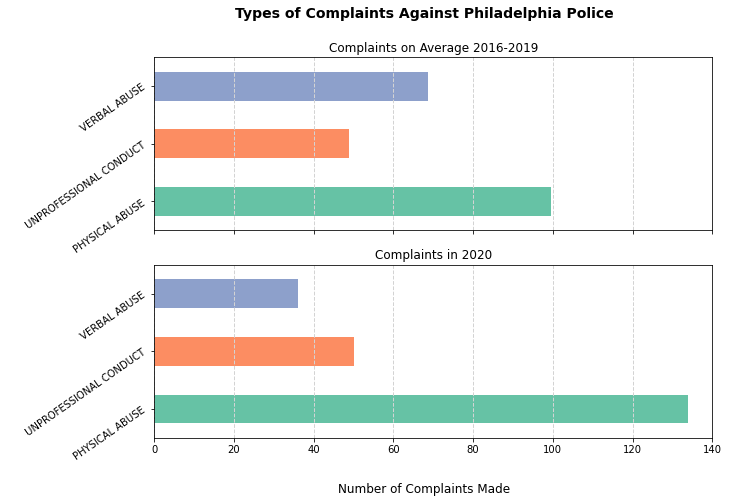

In [26]:
#nrows 1 and ncols 2 means plots are side by side
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,7))

#ax0
group1619.plot(kind='barh', 
                y="Counts", 
                x="offense", 
                ax=ax0, 
                color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax0.set_xlim([0, 140])
ax0.set(title="Complaints on Average 2016-2019", 
        xlabel=" ", 
        ylabel =" ")

#ax1
subset2020.plot(kind='barh', 
               y="Counts", 
               x="offense", 
               ax=ax1, 
               color= ['#66c2a5', '#fc8d62', '#8da0cb'])
ax1.set_xlim([0, 140])
ax1.set(title="Complaints in 2020", 
        xlabel=" ", 
        ylabel =" ")



#title the whole figure
fig.supxlabel('Number of Complaints Made')

fig.suptitle('Types of Complaints Against Philadelphia Police', 
             fontsize=14, fontweight='bold');

#change background color
ax1.set_facecolor("white")
ax0.set_facecolor("white")

# Rotate the yticks
plt.setp(ax1.get_yticklabels(), rotation=35, color="black")
plt.setp(ax0.get_yticklabels(), rotation=35, color="black")

# Add a grid background
ax1.grid(False, axis="y")
ax0.grid(False, axis="y")
ax1.grid(True, axis="x", color='lightgrey', linestyle = "--",linewidth=1)
ax0.grid(True, axis="x", color='lightgrey', linestyle = "--", linewidth=1)

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

Last year we saw more physical abuse compliants filed than the average from the previous four years. Unprofessional conduct complaints seemed to stay relatively the same, but there was a drop in verbal abuse complaints in 2020 compared to the previous 4-year average.

## Demographics of Complaint Filers Data 
### <i>Exploring, cleaning, and manipulating data </i>

In [27]:
demographics.head()

,complaint_id,complainant_sex,complainant_race,complainant_age
0,16-0001,male,white,28.0
1,16-0002,female,black,23.0
2,16-0003,female,black,25.0
3,16-0004,male,black,31.0
4,16-0005,male,NaN,47.0


In [28]:
#checking to see if these two Dfs have the same complaint_id
#they do!
complaints.head()

,complaint_id,date_received,district_occurrence,offense,summary,Counts,Month,Year
0,16-0001,2016-01-01,1700,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 1-2-16 at app...",0.0,1,2016
1,16-0002,2016-01-01,2400,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 1-2-16, they ...",0.0,1,2016
2,16-0003,2016-01-01,1900,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 12-29-15 at 6...",0.0,1,2016
3,16-0004,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
4,16-0005,2016-01-01,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w...",0.0,1,2016


In [29]:
complaintsdemo = demographics.merge(complaints, how='inner', on='complaint_id')
complaintsdemo.head()

,complaint_id,complainant_sex,complainant_race,complainant_age,date_received,district_occurrence,offense,summary,Counts,Month,Year
0,16-0001,male,white,28.0,2016-01-01,1700,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 1-2-16 at app...",0.0,1,2016
1,16-0002,female,black,23.0,2016-01-01,2400,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 1-2-16, they ...",0.0,1,2016
2,16-0003,female,black,25.0,2016-01-01,1900,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 12-29-15 at 6...",0.0,1,2016
3,16-0004,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
4,16-0005,male,NaN,47.0,2016-01-01,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w...",0.0,1,2016


In [30]:
#getting the same subset of complaint types (referred to here as offense). 
#will use this later with the Altair plots

complaintsdemoSubset = complaintsdemo.dropna(subset=['offense'])
complaintsdemoSubset = complaintsdemoSubset[complaintsdemoSubset['offense'].str.contains('VER|PHY|UNPROF')]
complaintsdemoSubset.head()

,complaint_id,complainant_sex,complainant_race,complainant_age,date_received,district_occurrence,offense,summary,Counts,Month,Year
3,16-0004,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
4,16-0005,male,NaN,47.0,2016-01-01,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w...",0.0,1,2016
6,16-0007,female,black,NaN,2016-01-01,900,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-19-15 at 6...",0.0,1,2016
15,16-0016,female,white,44.0,2016-01-01,300,PHYSICAL ABUSE,"According to the complainant, on 1-8-16 at 4:3...",0.0,1,2016
17,16-0018,female,black,40.0,2016-01-01,1500,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-2-15, they...",0.0,1,2016


In [31]:
#looking at just 2020 data, the most recent whole year 
complaintsdemo2020 = complaintsdemo.loc[complaintsdemo['Year'] == 2020]


In [32]:
#getting the same subset of complaint types (aka offense) 
#and limiting to the most numerous demogrphic types (race: Black, White, Latino)

complaintsdemo2020 = complaintsdemo2020[complaintsdemo2020['offense'].str.contains('VER|PHY|UNPROF')]
complaintsdemo2020 = complaintsdemo2020.rename(columns={'complainant_sex':'sex', 'complainant_race':'race', 'complainant_age':'age'})
complaintsdemo2020 = complaintsdemo2020[(complaintsdemo2020["race"]== "black")|(complaintsdemo2020["race"]== "white")|(complaintsdemo2020["race"]== "latino")].dropna()

complaintsdemo2020.tail()

,complaint_id,sex,race,age,date_received,district_occurrence,offense,summary,Counts,Month,Year
3442,20-0623,male,black,43.0,2020-12-01,1400,VERBAL ABUSE,"On 12-9-20 at 6:30 PM, police stopped, raciall...",0.0,12,2020
3445,20-0626,female,black,52.0,2020-12-01,300,PHYSICAL ABUSE,"The complainant, on behalf of three (3) juveni...",0.0,12,2020
3453,20-0632,female,black,17.0,2020-12-01,3900,PHYSICAL ABUSE,"According to the complainant, on 12-11-20 at 5...",0.0,12,2020
3458,20-0637,male,black,44.0,2020-12-01,1600,PHYSICAL ABUSE,"According to the complainant, on 9-21-19 at 2:...",0.0,12,2020
3474,20-0653,male,white,41.0,2020-12-01,2400,PHYSICAL ABUSE,"On 9-10-20 at 2:00 PM, while handcuffed and sh...",0.0,12,2020


# Seaborn: Categorical Data


Since I was wokring with demographic data, I chose to leverage seaborn's capabilities for categorical data.

In the swarm plot I was able to look at three different categorical variables (offense type, race, and sex) as they relate to one discrete variable (age). 

And in the violin plot, I took a closer look at how offense type vary between complainant age and sex. 



In [33]:
import seaborn as sns

### Seaborn 1 : Looking at complaint type, age, and race in 2020

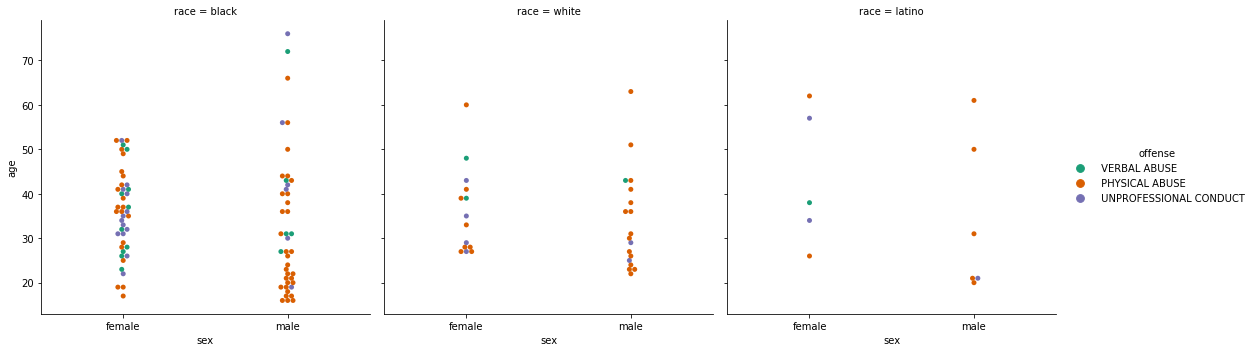

In [34]:

sns.catplot(
    data=complaintsdemo2020, 
    kind="swarm", 
    x="sex", 
    y="age", 
    hue="offense",
    col="race",
    palette = "Dark2" )

It appears that overall, that few complainants are above 60 years old. Black female complainants mostly clusterd between 30 and 45 years of age, while White female complaintants cluster closer to 30. 

### Seaborn 2:  Looking at complaint type, age, and sex

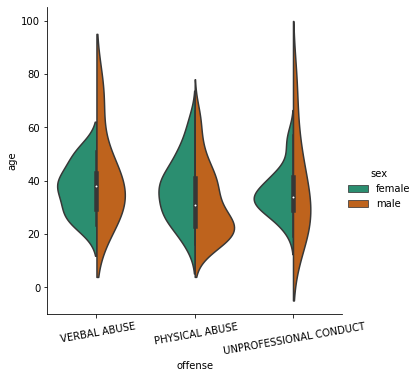

In [35]:



ax = sns.catplot(
    data=complaintsdemo2020, 
    kind = "violin",
    x="offense", 
    y="age", 
    hue="sex", 
    split=True,
    palette = "Dark2"
)
ax.set_xticklabels(rotation = 10)

#could not get the below to work, and using violinplot made my legend weird
#so I did it the way above instead
#Get the old, too-long labels
#old_labels = ax.get_xticklabels()
#line_width = 14
# Set the new, wrapped labels
#ax.set_xticklabels([tw.fill(label, width=line_width) for label in old_labels])

It appears that across differnt kinds of offenses included in the chart, most female complainants are between the age of 30 - 40, while the age of male complainants seem to be more spread out across offense type. (This plot also shows that are negative values in the age data.)

# Altair: Interactive Charts

While I have a lot of data, most of it is categorical. I thought that one way to show more without overwhelming the audience was to use selection brush with multiple charts as well as tooltips that offer more insight into the data presented.

In [36]:
import altair as alt  

In [37]:
#using the `complaintsdemoSubset, which is still a very l ong dataset, I'm pulling out for an additional subset of race demographivs

complaintsdemoSubsetRace = complaintsdemoSubset[(complaintsdemoSubset["complainant_race"]== "black")|(complaintsdemoSubset["complainant_race"]== "white")|(complaintsdemoSubset["complainant_race"]== "latino")|(complaintsdemoSubset["complainant_race"]== "asian")]

complaintsdemoSubsetRace.head()

,complaint_id,complainant_sex,complainant_race,complainant_age,date_received,district_occurrence,offense,summary,Counts,Month,Year
3,16-0004,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
6,16-0007,female,black,NaN,2016-01-01,900,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-19-15 at 6...",0.0,1,2016
15,16-0016,female,white,44.0,2016-01-01,300,PHYSICAL ABUSE,"According to the complainant, on 1-8-16 at 4:3...",0.0,1,2016
17,16-0018,female,black,40.0,2016-01-01,1500,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-2-15, they...",0.0,1,2016
20,16-0021,female,latino,39.0,2016-01-01,2500,PHYSICAL ABUSE,"According to the complainant, on 12-1-15 at 2:...",0.0,1,2016


In [38]:

complaintsdemoSubsetRace.head()

,complaint_id,complainant_sex,complainant_race,complainant_age,date_received,district_occurrence,offense,summary,Counts,Month,Year
3,16-0004,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
6,16-0007,female,black,NaN,2016-01-01,900,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-19-15 at 6...",0.0,1,2016
15,16-0016,female,white,44.0,2016-01-01,300,PHYSICAL ABUSE,"According to the complainant, on 1-8-16 at 4:3...",0.0,1,2016
17,16-0018,female,black,40.0,2016-01-01,1500,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-2-15, they...",0.0,1,2016
20,16-0021,female,latino,39.0,2016-01-01,2500,PHYSICAL ABUSE,"According to the complainant, on 12-1-15 at 2:...",0.0,1,2016


## Altair 1: Sex , Age, Complaint Type, and Annual Total of our Subset of Complaints 

In [50]:
brush = alt.selection(type='interval')
source = complaintsdemoSubsetRace.dropna()

color_map = {"female": "#1f77b4", "male": "#ff7f0e"}

bar = alt.Chart(source).mark_bar(opacity = 0.7).transform_filter(
    "datum.complainant_age > 0"
).encode(
    x=alt.X('offense:N', title = "Complaint Type"),
    y=alt.Y('complainant_age:O', bin=alt.Bin(maxbins=10), stack = None),
    color=alt.Color('complainant_sex:N',
                        scale=alt.Scale(domain=['female', 'male'],
                                       range = ["#1f77b4", "#ff7f0e"])),
    #size = 'count()'
    tooltip=[alt.Tooltip('complainant_race:N', title="race of Filers"),
            alt.Tooltip('count():Q', title="Number of Filers")]
).transform_filter(
        brush.ref() # the filter transform uses the selection to filter the input data to this chart
    ).properties(
        selection=brush,
        width=300,
        height = 500
    )

allyear = alt.Chart(source).mark_bar().encode(
        x=alt.X('count():N'),
        y='Year:O',
        color=alt.Color('complainant_sex:N', title = "sex")
    ).properties(
        selection=brush,
        width=300,
        height = 500
    ) 


In [51]:
bar | allyear

alt.HConcatChart(...)

This interactive chart gives you insight into the distriubtion of complainant age and sex for each complaint category. It offers an overview of the number of Physical Abuse, Verbal Abuse, and Unprofessional Conduct complaints made each year broken down by sex. As you select a year on the right, the age and sex values on the left correspond.

## Complaint Investigation and Discipline Data 
### <i>Exploring, cleaning, and manipulating data </i>


In [95]:
disciplines.head()
#same id structure, time to join

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings
0,16-0001,NaN,NaN,NaN,NaN,No C.A.P. Investigation,Not Applicable,Not Applicable
1,16-0002,49788591.0,latino,male,9807 SUPP POLICE SERVICE,No C.A.P. Investigation,Not Applicable,Not Applicable
2,16-0003,16617433.0,black,male,1900 19TH DISTRICT,No C.A.P. Investigation,Not Applicable,Not Applicable
3,16-0004,42698976.0,white,male,5200 TRAFFIC DISTRICT,Verbal Abuse,No Sustained Findings,Not Applicable
4,16-0005,10551607.0,black,female,7700 AIRPORT,Verbal Abuse,No Sustained Findings,Not Applicable


# Combining all three datasets

In [96]:
whole = disciplines.merge(complaintsdemo, how='inner', on='complaint_id')

whole["allegations_investigated"].unique()

array(['No C.A.P. Investigation', 'Verbal Abuse', 'Lack of Service',
       'Domestic', 'Unprofessional Conduct', 'Departmental Violation',
       'Criminal Allegation', 'Harassment', 'Physical Abuse',
       'Referred to Other Agency/C.A.P. Investigation',
       'Civil Rights Complaint', 'Sexual Crime/Misconduct',
       'Disciplinary Code Violation', 'Falsification', 'Other Misconduct',
       'Investigation OnGoing', 'Drugs', '#VALUE!'], dtype=object)

In [97]:
whole = whole.rename(columns={'complainant_sex':'sex', 'complainant_race':'race', 'complainant_age':'age', 'Counts':'counts' })
whole.head()

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings,sex,race,age,date_received,district_occurrence,offense,summary,counts,Month,Year
0,16-0001,NaN,NaN,NaN,NaN,No C.A.P. Investigation,Not Applicable,Not Applicable,male,white,28.0,2016-01-01,1700,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 1-2-16 at app...",0.0,1,2016
1,16-0002,49788591.0,latino,male,9807 SUPP POLICE SERVICE,No C.A.P. Investigation,Not Applicable,Not Applicable,female,black,23.0,2016-01-01,2400,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 1-2-16, they ...",0.0,1,2016
2,16-0003,16617433.0,black,male,1900 19TH DISTRICT,No C.A.P. Investigation,Not Applicable,Not Applicable,female,black,25.0,2016-01-01,1900,NON-INVESTIGATORY INCIDENT,"According to the complainant, on 12-29-15 at 6...",0.0,1,2016
3,16-0004,42698976.0,white,male,5200 TRAFFIC DISTRICT,Verbal Abuse,No Sustained Findings,Not Applicable,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
4,16-0005,10551607.0,black,female,7700 AIRPORT,Verbal Abuse,No Sustained Findings,Not Applicable,male,NaN,47.0,2016-01-01,7700,VERBAL ABUSE,"According to the complainant, on 12-24- they w...",0.0,1,2016


### Investigations

I only want to look at complaints that were investigated

In [98]:
#get rid of all "non-investigatory incidents" so that I can get the pct of investigations that end up wiht sustained findings
findings = whole[(whole["investigative_findings"] == "No Sustained Findings") | (whole["investigative_findings"] == "Sustained Finding")| (whole["investigative_findings"] == "Pending")]
findings["offense"].unique()
findings = findings.rename(columns = {'counts':'findings_counts'})

In [99]:
#limiting to black, white, latino, asian
findings = findings[(findings["race"]== "black")|(findings["race"]== "white")|(findings["race"]== "latino")|(findings["race"]== "asian")]

findings.head()

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings,sex,race,age,date_received,district_occurrence,offense,summary,findings_counts,Month,Year
3,16-0004,42698976.0,white,male,5200 TRAFFIC DISTRICT,Verbal Abuse,No Sustained Findings,Not Applicable,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
5,16-0006,NaN,NaN,NaN,NaN,Lack of Service,No Sustained Findings,Not Applicable,male,black,50.0,2016-01-01,1500,LACK OF SERVICE,"According to the complainant, on 7-15-15 at 7:...",0.0,1,2016
6,16-0006,34517423.0,white,female,1500 15TH DISTRICT,Domestic,No Sustained Findings,Not Applicable,male,black,50.0,2016-01-01,1500,LACK OF SERVICE,"According to the complainant, on 7-15-15 at 7:...",0.0,1,2016
7,16-0007,75233613.0,other,female,4921 RADIO ROOM,Unprofessional Conduct,No Sustained Findings,Not Applicable,female,black,NaN,2016-01-01,900,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-19-15 at 6...",0.0,1,2016
14,16-0009,68604909.0,white,male,1200 12TH DISTRICT,Departmental Violation,No Sustained Findings,Not Applicable,female,black,NaN,2016-01-01,1200,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 12-30-15 and ...",0.0,1,2016


## Altair 2: Looking at Investigation Findings and Race + Interactivity


In [100]:
#only looking the same kind of offenses as before, for the same reasons and also because the dataset is too large
findings = findings.dropna()
subsetfindings = findings[findings['offense'].str.contains('VER|PHY|UNPROF')]
subsetfindings.head()

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings,sex,race,age,date_received,district_occurrence,offense,summary,findings_counts,Month,Year
3,16-0004,42698976.0,white,male,5200 TRAFFIC DISTRICT,Verbal Abuse,No Sustained Findings,Not Applicable,male,black,31.0,2016-01-01,700,VERBAL ABUSE,"According to the complainant, on 1-3-16 at 8:0...",0.0,1,2016
33,16-0016,68204080.0,white,male,0300 03RD DISTRICT,Physical Abuse,No Sustained Findings,Not Applicable,female,white,44.0,2016-01-01,300,PHYSICAL ABUSE,"According to the complainant, on 1-8-16 at 4:3...",0.0,1,2016
34,16-0016,37460214.0,white,male,0300 03RD DISTRICT,Physical Abuse,No Sustained Findings,Not Applicable,female,white,44.0,2016-01-01,300,PHYSICAL ABUSE,"According to the complainant, on 1-8-16 at 4:3...",0.0,1,2016
36,16-0018,33309442.0,white,male,6400 NORTHEAST DET,Lack of Service,No Sustained Findings,Not Applicable,female,black,40.0,2016-01-01,1500,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-2-15, they...",0.0,1,2016
37,16-0018,33309442.0,white,male,6400 NORTHEAST DET,Verbal Abuse,No Sustained Findings,Not Applicable,female,black,40.0,2016-01-01,1500,UNPROFESSIONAL CONDUCT,"According to the complainant, on 12-2-15, they...",0.0,1,2016


In [101]:
alt.Chart(subsetfindings).mark_bar(opacity=0.9).encode(
    x=alt.X('count(offense):Q', stack='zero', title = "Number of Complaints"),
    y=alt.Y('investigative_findings:O',title = "Investigation Outcome"),
    color=alt.Color('race:N', scale=alt.Scale(scheme='magma'), title="race"),
    tooltip=[alt.Tooltip('race:N', title="Race of Filers"),
            alt.Tooltip('count(race):Q', title="Number of Filers")]
    
).properties(height=300, width=700, title= {"text": ["Investigation Findings of Complaints Against Philadelphia PD by Race"],
                                            "subtitle" :["Physical Abuse, Verbal Abuse, and Unprofessional Conduct Complaints from 2016 - 2020"]})


alt.Chart(...)

This first chart examines the result of complaint investigations from 2016 to 2020 by race. The counts of complaints was calculated in the chart and you can hover each bar to get the exact value being represented.

It's obvious from the chart that the majority of complainants are Black, and the majority of comaplaints that are investigted result in no findings. 

In [102]:
#just want to explore a little here
findingsresults = findings.groupby("investigative_findings", as_index= False).count().sort_values(by= "findings_counts", ascending = False)
findingsresults = findingsresults[["investigative_findings", "findings_counts"]]
totalfindings  = findingsresults["findings_counts"].sum()
#this is pct of findings total
findingsresults['Pct']=(findingsresults["findings_counts"]/totalfindings)*100
findingsresults.round(decimals = 2)

,investigative_findings,findings_counts,Pct
0,No Sustained Findings,4963,71.37
2,Sustained Finding,1580,22.72
1,Pending,411,5.91


I want to look at findings by race, sex, and year

In [103]:
# grouping by sex, race, year, and investigative findings
findingsnoageY = findings.groupby(["sex", "race", "investigative_findings", "Year"], as_index = False).count().sort_values(by = "findings_counts", ascending = False)
findingsnoageY = findingsnoageY[["sex", "race", "investigative_findings", "findings_counts", "Year"]]

findingsnoageY.head()

,sex,race,investigative_findings,findings_counts,Year
68,male,black,No Sustained Findings,566,2019
67,male,black,No Sustained Findings,472,2018
66,male,black,No Sustained Findings,410,2017
9,female,black,No Sustained Findings,401,2017
8,female,black,No Sustained Findings,359,2016


In [104]:
# now lets get percentages 
findingsnoageY['Pct_Findings']=(findingsnoageY["findings_counts"]/totalfindings)*100
findingsnoageY = findingsnoageY.sort_values(by="Pct_Findings", ascending = False)
findingsnoageY.round(decimals = 2).head()



,sex,race,investigative_findings,findings_counts,Year,Pct_Findings
68,male,black,No Sustained Findings,566,2019,8.14
67,male,black,No Sustained Findings,472,2018,6.79
66,male,black,No Sustained Findings,410,2017,5.90
9,female,black,No Sustained Findings,401,2017,5.77
8,female,black,No Sustained Findings,359,2016,5.16


In [105]:
# to compare to the number of complaints filed broken down by year, sex, race
sexraceY = whole.groupby(["sex", "race", "Year"], as_index = False).count().sort_values(by = 'counts', ascending = False)
sexraceY = sexraceY[["sex", "race", "counts", "Year"]]
sexraceY = sexraceY.rename(columns={'counts':'complaint_counts'})
sexraceY = sexraceY[(sexraceY["race"]== "black")|(sexraceY["race"]== "white")|(sexraceY["race"]== "latino")|(sexraceY["race"]== "asian")]
sexracesumY  = sexraceY["complaint_counts"].sum()
sexraceY["Pct_Complaints"] = (sexraceY["complaint_counts"]/sexracesumY)*100


sexraceY.head()

,sex,race,complaint_counts,Year,Pct_Complaints
44,male,black,894,2019,10.749068
43,male,black,693,2018,8.332331
42,male,black,571,2017,6.865456
41,male,black,533,2016,6.408561
7,female,black,523,2017,6.288325


## Altair 3: Average Number of Complaints by Race and Year From Full Set of Data

In [106]:
bar = (
    alt.Chart(sexraceY.dropna())
    .mark_bar()
    .encode(
        x=alt.X( "Year:O", title = "Year"),
        y=alt.Y('mean(complaint_counts):Q', title = "Average Number of Complaints"),
        color=alt.Color('race:N', scale=alt.Scale(scheme='magma'), title="race"),
        tooltip=[alt.Tooltip('mean(complaint_counts):Q', title="average no. complaints by"),
                 alt.Tooltip("race:N", title = "race")]
    ).properties(height=300, width=500)
    
)
tick = alt.Chart(sexraceY.dropna()).mark_tick(
    color='white',
    thickness=5,
    size=40 * 0.9,  # controls width of tick.
).encode(
    x='Year:O',
    y=alt.Y('mean(complaint_counts):Q', title = "Average Number of Complaints" ),
    tooltip=[alt.Tooltip('mean(complaint_counts):Q', title="overall average no. complaints")]
).properties(height=300, width=700, title= {"text": ["Average Number of Complaints Against Philadelphia PD by Race"],
                                            "subtitle" :["All Complaints from 2016 - 2020"]})

bar + tick

alt.LayerChart(...)

Unlike the previous chart, te chart above shows the average number of complaints not limited by type. The average number of complaints is broken down race and age. Additionally a white tick on each bar indentifies the average number of complaints overall for each year, regardless of race. 

2019 shows the highest average overall and the highest average for each race, except for complainants who are Asian.